In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import datetime as dt
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import math

%matplotlib inline
style.use('seaborn')

In [2]:
tf.__version__

'2.2.0'

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)

Training Size:  60000
Testing Size:  10000


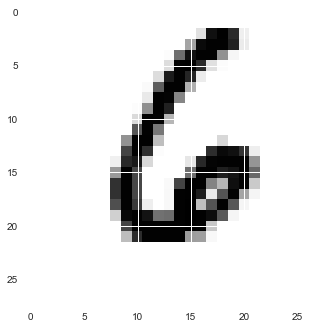

In [4]:
import random
print("Training Size: ", len(x_train))
print("Testing Size: ", len(x_test))
plt.imshow(x_train[random.randint(0,255)].reshape(28,28))

In [5]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28,1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, NumpyArrayIterator

train_datagen = ImageDataGenerator()
test_datagen  = ImageDataGenerator()

train_generator = NumpyArrayIterator(x_train, y_train, train_datagen, batch_size=500)

validation_generator =  NumpyArrayIterator(x_test,y_test, test_datagen, batch_size=500)

model.compile(
    loss='sparse_categorical_crossentropy',
    #optimizer=tf.keras.optimizers.Adam(0.001),
    optimizer='rmsprop',
    metrics=['accuracy'],
)

model.fit(train_generator, steps_per_epoch=len(x_train)/500,verbose=1, epochs=10)

Epoch 1/10
120/120 [==============================] - 11s 92ms/step - loss: 0.5331 - accuracy: 0.8413
Epoch 2/10
120/120 [==============================] - 11s 92ms/step - loss: 0.1447 - accuracy: 0.9556
Epoch 3/10
120/120 [==============================] - 11s 94ms/step - loss: 0.0911 - accuracy: 0.9715
Epoch 4/10
120/120 [==============================] - 11s 93ms/step - loss: 0.0672 - accuracy: 0.9798
Epoch 5/10
120/120 [==============================] - 11s 93ms/step - loss: 0.0531 - accuracy: 0.9837
Epoch 6/10
120/120 [==============================] - 11s 93ms/step - loss: 0.0426 - accuracy: 0.9869
Epoch 7/10
120/120 [==============================] - 11s 94ms/step - loss: 0.0366 - accuracy: 0.9885
Epoch 8/10
120/120 [==============================] - 11s 94ms/step - loss: 0.0302 - accuracy: 0.9907
Epoch 9/10
120/120 [==============================] - 12s 97ms/step - loss: 0.0248 - accuracy: 0.9923
Epoch 10/10
120/120 [==============================] - 12s 97ms/step - loss: 0.021

In [9]:
val_loss, val_acc = model.evaluate(validation_generator)
print(val_loss, val_acc)

20/20 [==============================] - 1s 25ms/step - loss: 0.0393 - accuracy: 0.9874
0.03933245316147804 0.9873999953269958


In [10]:
predictions = model.predict(validation_generator)

Index:  4222
Prediction:  3
Actual:  3


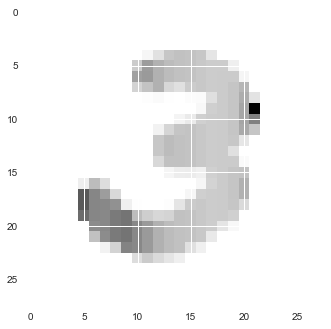

In [11]:
idx = random.randint(0,9500)
print("Index: ",idx)
print("Prediction: ", np.argmax(predictions[idx]))
print("Actual: ", y_test[idx])
plt.imshow(x_test[idx].reshape(28,28))

In [12]:
model.save('ocr.h5')

In [13]:
ocr_model = tf.keras.models.load_model('ocr.h5')

In [14]:
IMG_SIZE = 28
from skimage.transform import rescale, resize, downscale_local_mean

3

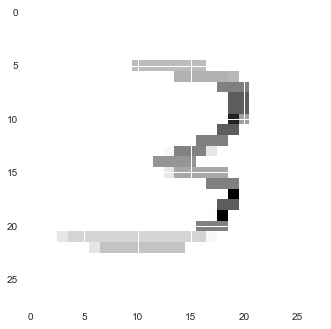

In [15]:
data = np.loadtxt('image.txt')
data = data.reshape(400,400)
image_resized = resize(data, (IMG_SIZE, IMG_SIZE), anti_aliasing=False)
image_resized = tf.keras.utils.normalize(image_resized, axis=1)
plt.imshow(image_resized)
image_resized = image_resized.reshape(1,IMG_SIZE,IMG_SIZE,1)
val = ocr_model.predict(image_resized)
np.argmax(val[0])